In [2]:
#import librraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data

train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

In [4]:
#Data Preparation
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
train_df.drop("Cabin",axis=1, inplace = True)

In [12]:
test_df.drop("Cabin",axis=1, inplace = True)

In [13]:
train_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C


In [26]:
train_df.Age.fillna(train_df.Age.mean(), inplace = True)

In [28]:
test_df.Age.fillna(test_df.Age.mean(), inplace = True)

In [30]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [32]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [34]:
test_df['Fare'] = test_df['Fare'].fillna(test_df.groupby('Pclass')['Fare'].transform('median'))


In [36]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [38]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
#Exploratory Data Analysis (EDA)

train_df.shape

(891, 11)

In [44]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

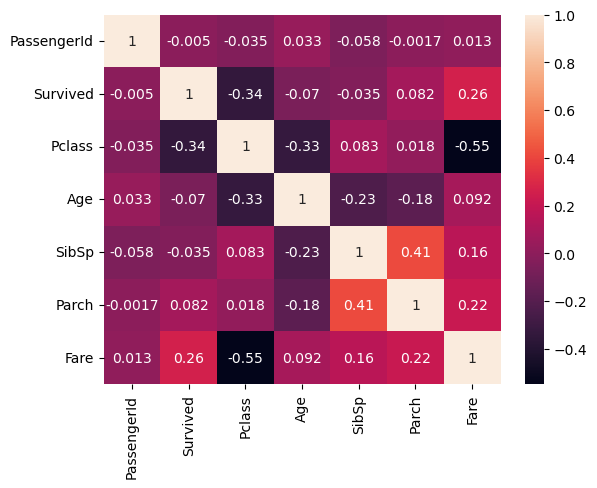

In [46]:
sns.heatmap(train_df.select_dtypes(include="number").corr(), annot = True);

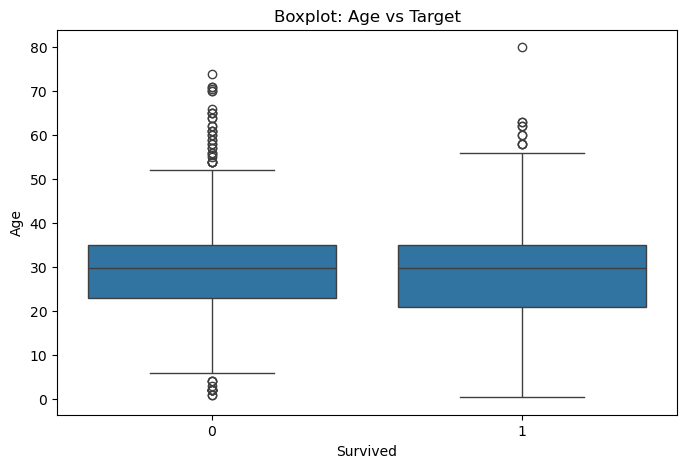

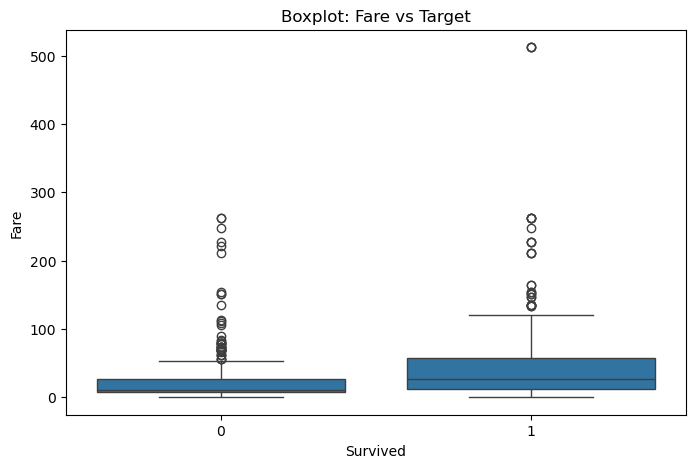

In [48]:
features = ['Age', 'Fare']

# Döngü ile her özellik için bir boxplot çiz
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='Survived', y=feature)
    plt.title(f"Boxplot: {feature} vs Target")
    plt.show()

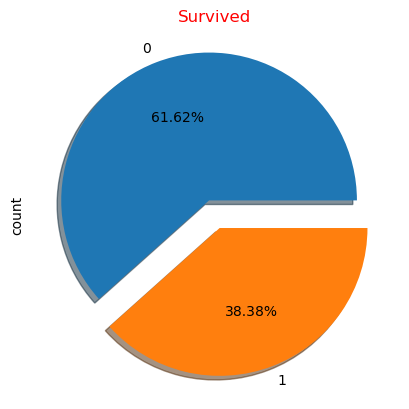

In [50]:
plt.rcParams.update({'font.size': 10})
train_df['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [52]:
#Train | Test Split

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [54]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [56]:
train_df.Embarked_Q = train_df.Embarked_Q.astype(int)
train_df.Embarked_S = train_df.Embarked_S.astype(int)

test_df.Embarked_Q = test_df.Embarked_Q.astype(int)
test_df.Embarked_S = test_df.Embarked_S.astype(int)

In [58]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [60]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Modelling | Model Performance

Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
operations = [("logistic",LogisticRegression())]

In [68]:
logistic_vanilia = Pipeline(steps= operations).fit(X_train,y_train)

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
eval_metric(logistic_vanilia, X_train, y_train, X_val, y_val)


Test_Set
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Train_Set
[[385  59]
 [ 82 186]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [76]:
y_pred_test = logistic_vanilia.predict(X_val)
y_pred_train = logistic_vanilia.predict(X_train)

logistic_vanilia_accuracy_test = accuracy_score(y_val, y_pred_test)
logistic_vanilia_accuracy_train = accuracy_score(y_train, y_pred_train)

logistic_vanilia_f1_test = f1_score(y_val, y_pred_test, average='macro')
logistic_vanilia_f1_train = f1_score(y_train, y_pred_train, average='macro')

logistic_vanilia_accuracy_test, logistic_vanilia_accuracy_train, logistic_vanilia_f1_test, logistic_vanilia_f1_train

(0.8100558659217877,
 0.8019662921348315,
 0.8025051921079958,
 0.7851856131363901)

Logistic Regression GridSearchCV

In [80]:
operations = [("logistic",LogisticRegression())]
logistic = Pipeline(steps= operations)

In [82]:
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # C değeri genişletildi
    'logistic__penalty': ['l1', 'l2'],  # Hem l1 hem l2 kullanılıyor
    'logistic__solver': ['liblinear', 'lbfgs'],  # Uyumlu solver'lar
    'logistic__class_weight': [None, 'balanced'],  # Dengesiz veri seti için balanced
    'logistic__max_iter': [200, 500]  # Daha fazla iterasyon denendi
}
  

cv = StratifiedKFold(n_splits = 10)

In [84]:
logistic_grid = GridSearchCV(estimator = logistic,
                             param_grid= param_grid,
                             cv = cv,
                             scoring='f1',
                             n_jobs= -1,
                             return_train_score= True).fit(X_train,y_train)

In [86]:
logistic_grid.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': None,
 'logistic__max_iter': 200,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [88]:
eval_metric(logistic_grid, X_train, y_train, X_val, y_val)

Test_Set
[[88 17]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179


Train_Set
[[384  60]
 [ 81 187]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       444
           1       0.76      0.70      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



SVM

In [91]:
from sklearn.svm import SVC

In [93]:
svc_vanila = SVC(kernel = "linear", C = 1).fit(X,y)

In [95]:
eval_metric(svc_vanila, X_train, y_train, X_val, y_val)

Test_Set
[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[380  64]
 [ 87 181]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [97]:
y_pred_test = svc_vanila.predict(X_val)
y_pred_train = svc_vanila.predict(X_train)

svc_vanila_accuracy_test = accuracy_score(y_val, y_pred_test)
svc_vanila_accuracy_train = accuracy_score(y_train, y_pred_train)

svc_vanila_f1_test = f1_score(y_val, y_pred_test, average='macro')
svc_vanila_f1_train = f1_score(y_train, y_pred_train, average='macro')

svc_vanila_accuracy_test, svc_vanila_accuracy_train, svc_vanila_f1_test, svc_vanila_f1_train

(0.7821229050279329, 0.7879213483146067, 0.772938689217759, 0.7699505502382618)

SVM GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

In [102]:
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ["scale", "auto", 0.1, 1],
    'degree': [1, 2, 3]
}
#cv = StratifiedKFold(n_splits = 10)

svm_grid = GridSearchCV(svm, param_grid, n_jobs=-1)

Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [107]:
operations = [("DT_model",DecisionTreeClassifier())]
decison_vanilla = Pipeline(steps= operations)

In [109]:
decison_vanilla.fit(X_train, y_train)

Pipeline(steps=[('DT_model', DecisionTreeClassifier())])

In [111]:
eval_metric(decison_vanilla, X_train, y_train, X_val, y_val)

Test_Set
[[85 20]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[443   1]
 [ 13 255]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



DecisonTree GridSearchCV

In [114]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 5],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 5],
              "DT_model__min_samples_split": [2, 3, 5,]
    
}

In [116]:
operations = [("DT_model",DecisionTreeClassifier())]
decison_model = Pipeline(steps= operations)

decison_grid = GridSearchCV(estimator=decison_model,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt

In [118]:
decison_grid.best_params_

{'DT_model__max_depth': 3,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 2,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'best'}

In [120]:
eval_metric(decison_grid, X_train, y_train, X_val, y_val)

Test_Set
[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[401  43]
 [ 75 193]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       444
           1       0.82      0.72      0.77       268

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712



In [122]:
y_pred_test = decison_grid.predict(X_val)
y_pred_train = decison_grid.predict(X_train)

decison_grid_accuracy_test = accuracy_score(y_val, y_pred_test)
decison_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

decison_grid_f1_test = f1_score(y_val, y_pred_test, average='macro')
decison_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

decison_grid_accuracy_test, decison_grid_accuracy_train, decison_grid_f1_test, decison_grid_f1_train

(0.7988826815642458,
 0.8342696629213483,
 0.7877470355731226,
 0.8188060731538992)

Randomforest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
operations = [("RF_model",RandomForestClassifier(random_state=101))]
rf_vanilla = Pipeline(steps= operations).fit(X_train,y_train)

In [131]:
eval_metric(rf_vanilla, X_train, y_train, X_val, y_val)

Test_Set
[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Train_Set
[[441   3]
 [ 11 257]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.99      0.96      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



RandomForest GridSearchCV

In [136]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             # 'class_weight': ['balanced',None],
             'RF_model__max_samples':[0.8, 1]}
cv = StratifiedKFold(n_splits = 10)

In [138]:
operations = [("RF_model",RandomForestClassifier(random_state=101))]
rf_model = Pipeline(steps= operations)

In [140]:
rf_grid_model = GridSearchCV(rf_model, param_grid, cv = cv, scoring = "f1", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits
[CV] END RF_model__max_depth=2, RF_model__max_features=2, RF_model__max_samples=0.8, RF_model__min_samples_leaf=2, RF_model__min_samples_split=2, RF_model__n_estimators=64; total time=   0.2s
[CV] END RF_model__max_depth=2, RF_model__max_features=2, RF_model__max_samples=0.8, RF_model__min_samples_leaf=2, RF_model__min_samples_split=2, RF_model__n_estimators=128; total time=   0.3s
[CV] END RF_model__max_depth=2, RF_model__max_features=2, RF_model__max_samples=0.8, RF_model__min_samples_leaf=2, RF_model__min_samples_split=2, RF_model__n_estimators=200; total time=   0.4s
[CV] END RF_model__max_depth=2, RF_model__max_features=2, RF_model__max_samples=0.8, RF_model__min_samples_leaf=2, RF_model__min_samples_split=3, RF_model__n_estimators=64; total time=   0.1s
[CV] END RF_model__max_depth=2, RF_model__max_features=2, RF_model__max_samples=0.8, RF_model__min_samples_leaf=2, RF_model__min_samples_split=3, RF_model__n_estimat

In [141]:
rf_grid_model.best_params_

{'RF_model__max_depth': 4,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 2,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 200}

In [142]:
eval_metric(rf_grid_model, X_train, y_train, X_val, y_val)

Test_Set
[[94 11]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179


Train_Set
[[418  26]
 [ 79 189]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       444
           1       0.88      0.71      0.78       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.84       712
weighted avg       0.86      0.85      0.85       712



In [143]:
y_pred_test = rf_grid_model.predict(X_val)
y_pred_train = rf_grid_model.predict(X_train)

rf_grid_model_accuracy_test = accuracy_score(y_val, y_pred_test)
rf_grid_model_accuracy_train = accuracy_score(y_train, y_pred_train)

rf_grid_model_f1_test = f1_score(y_val, y_pred_test, average='macro')
rf_grid_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

rf_grid_model_accuracy_test, rf_grid_model_accuracy_train, rf_grid_model_f1_test, rf_grid_model_f1_train

(0.8156424581005587,
 0.8525280898876404,
 0.8049014103114576,
 0.8355126368802847)

AdaBoost

In [166]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier    # pip install catboost
from lightgbm import LGBMClassifier    # pip install lightgbm
from xgboost import XGBClassifier    # pip install xgboost

In [168]:
ada_vanilla = AdaBoostClassifier(random_state=42).fit(X_train, y_train)

AdaBoost GridSearchCV

In [173]:
model = AdaBoostClassifier(random_state=42)

In [175]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1]
}
cv = StratifiedKFold(n_splits = 10)

In [177]:
ada_grid = GridSearchCV(model, param_grid, cv=cv, scoring= "f1")

In [179]:
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [181]:
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [183]:
eval_metric(ada_grid, X_train, y_train, X_val, y_val)

Test_Set
[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[405  39]
 [ 62 206]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       444
           1       0.84      0.77      0.80       268

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712



In [185]:
y_pred_test = ada_grid.predict(X_val)
y_pred_train = ada_grid.predict(X_train)

ada_grid_accuracy_test = accuracy_score(y_val, y_pred_test)
ada_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

ada_grid_f1_test = f1_score(y_val, y_pred_test, average='macro')
ada_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

ada_grid_accuracy_test, ada_grid_accuracy_train, ada_grid_f1_test, ada_grid_f1_train

(0.8156424581005587,
 0.8581460674157303,
 0.8095560499081149,
 0.8461258647289036)

GradientBoosting

In [188]:
grad_vanilla = GradientBoostingClassifier(random_state=42)
grad_vanilla.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [190]:
eval_metric(grad_vanilla, X_train, y_train, X_val, y_val)

Test_Set
[[94 11]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179


Train_Set
[[433  11]
 [ 58 210]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       444
           1       0.95      0.78      0.86       268

    accuracy                           0.90       712
   macro avg       0.92      0.88      0.89       712
weighted avg       0.91      0.90      0.90       712



In [192]:
y_pred_test = grad_vanilla.predict(X_val)
y_pred_train = grad_vanilla.predict(X_train)

grad_vanilla_accuracy_test = accuracy_score(y_val, y_pred_test)
grad_vanilla_accuracy_train = accuracy_score(y_train, y_pred_train)

grad_vanilla_f1_test = f1_score(y_val, y_pred_test, average='macro')
grad_vanilla_f1_train = f1_score(y_train, y_pred_train, average='macro')

grad_vanilla_accuracy_test, grad_vanilla_accuracy_train, grad_vanilla_f1_test, grad_vanilla_f1_train

(0.8156424581005587,
 0.9030898876404494,
 0.8049014103114576,
 0.8925494570388111)

GradientBoosting GridsearchCV

In [195]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [0.5, 0.8],
    "max_features": [None, 2, 34],
    "learning_rate": [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}
grad_vanilla = GradientBoostingClassifier(random_state=42)
cv = StratifiedKFold(n_splits = 10)

In [197]:
gb_grid = GridSearchCV(grad_vanilla,
                       param_grid,
                       cv = cv,
                       scoring="f1",
                       verbose=2,
                       n_jobs=-1,
                       return_train_score=True).fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


In [199]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [201]:
eval_metric(gb_grid, X_train, y_train, X_val, y_val)

Test_Set
[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[423  21]
 [ 81 187]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       444
           1       0.90      0.70      0.79       268

    accuracy                           0.86       712
   macro avg       0.87      0.83      0.84       712
weighted avg       0.86      0.86      0.85       712



XGBoost

In [204]:
xgb_vanilla = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [206]:
eval_metric(xgb_vanilla, X_train, y_train, X_val, y_val)

Test_Set
[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Train_Set
[[438   6]
 [ 20 248]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       444
           1       0.98      0.93      0.95       268

    accuracy                           0.96       712
   macro avg       0.97      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712



XGBoost GridsearchCV

In [209]:
param_grid = {
     "n_estimators": [ 100, 200, 300, 400],
     'max_depth': [3, 4, 5],
     "learning_rate": [0.1, 0.2, 0.5, 1],
     "subsample": [0.5, 0.8, 1],
     "colsample_bytree": [0.4, 0.5, 0.7]
 }

cv = StratifiedKFold(n_splits = 10)

In [211]:
xgb_model = XGBClassifier(random_state=42)

In [213]:
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=cv, scoring="f1", n_jobs=-1, verbose=2, return_train_score=True).fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, ma

In [215]:
xgb_grid.best_params_ 

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [217]:
eval_metric(xgb_grid, X_train, y_train, X_val, y_val)

Test_Set
[[90 15]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[432  12]
 [ 32 236]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       444
           1       0.95      0.88      0.91       268

    accuracy                           0.94       712
   macro avg       0.94      0.93      0.93       712
weighted avg       0.94      0.94      0.94       712



In [219]:
y_pred_test = xgb_grid.predict(X_val)
y_pred_train = xgb_grid.predict(X_train)

xgb_grid_accuracy_test = accuracy_score(y_val, y_pred_test)
xgb_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_grid_f1_test = f1_score(y_val, y_pred_test, average='macro')
xgb_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_grid_accuracy_test, xgb_grid_accuracy_train, xgb_grid_f1_test, xgb_grid_f1_train

(0.8268156424581006,
 0.9382022471910112,
 0.8210981074894412,
 0.9331352661954034)

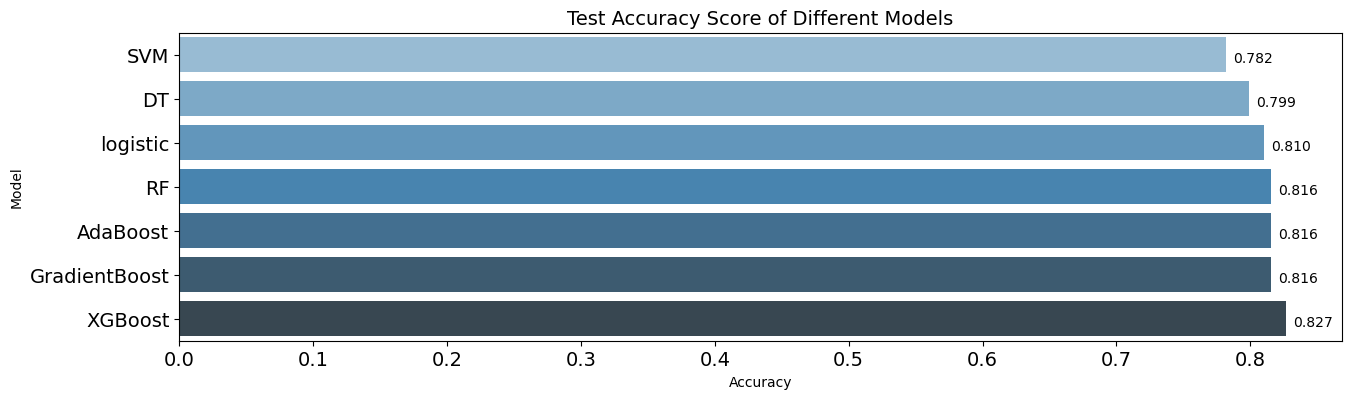

In [221]:
compare = pd.DataFrame({"Model": ["logistic", "SVM", "DT","RF","AdaBoost","GradientBoost","XGBoost"],
                        "Accuracy": [logistic_vanilia_accuracy_test, svc_vanila_accuracy_test, decison_grid_accuracy_test,rf_grid_model_accuracy_test,ada_grid_accuracy_test,grad_vanilla_accuracy_test,xgb_grid_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

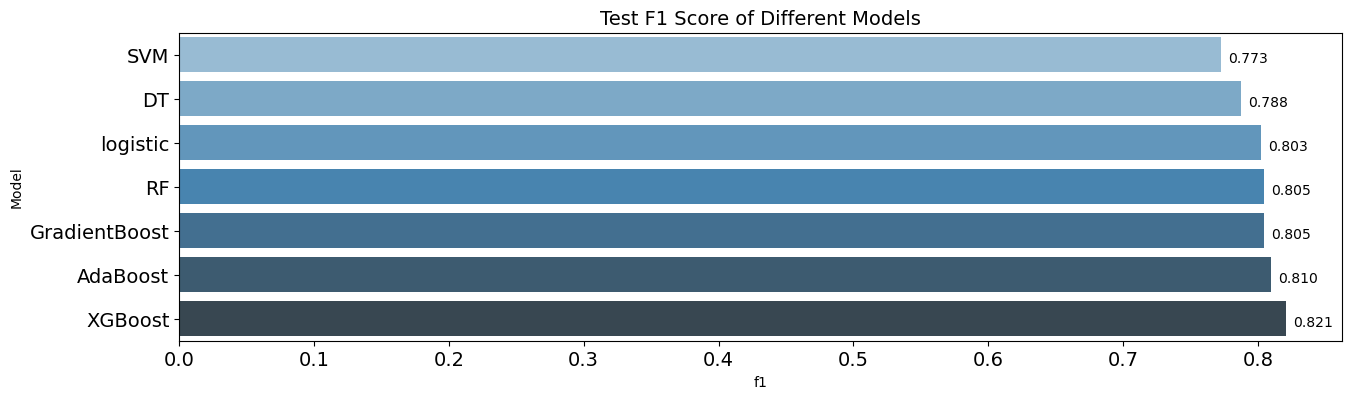

In [223]:
compare = pd.DataFrame({"Model": ["logistic", "SVM", "DT","RF","AdaBoost","GradientBoost","XGBoost"],
                        "f1": [logistic_vanilia_f1_test, svc_vanila_f1_test, decison_grid_f1_test,rf_grid_model_f1_test,ada_grid_f1_test,grad_vanilla_f1_test,xgb_grid_f1_test]})

compare = compare.sort_values(by="f1", ascending=True)

plt.figure(figsize=(15,4))
ax = sns.barplot(x="f1", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);